__Random Monkey Stock Picker__

In [1]:
# load a list of all S&P 500 companies
import pandas as pd

df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = df[0]
df = df[['Symbol', 'Security', 'GICS Sector']]
df['Ticker'] = df['Symbol']
df['Company'] = df['Security']
df = df[['Ticker', 'Company', 'GICS Sector']]
df.head()

,Ticker,Company,GICS Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology


Generate a random stock picker

In [6]:
import pandas as pd
import numpy as np

stock_data = pd.read_csv('SP500_stock_prices.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data[stock_data['Date'] >= '2019-07-05']
stock_data = stock_data[stock_data['Date'] <= '2020-04-02']
stock_data = stock_data[['Date', 'Ticker', 'Open']]
# Make Date the index
stock_data = stock_data.set_index('Date')

# Calculate returns over 63 business days
# select only the ticker index
indiviual_datas = []

for ticker in stock_data['Ticker'].unique():
    #data_ticker = data.xs(0, level=1).copy()
    data_ticker = stock_data[stock_data['Ticker'] == ticker].copy()
    # make target column
    data_ticker['63-day Price Movement'] = data_ticker['Open'].pct_change(63).shift(-63)
    data_ticker.dropna(inplace=True)
    data_ticker

    indiviual_datas.append(data_ticker)

data_all_tickers = pd.concat(indiviual_datas)
data_all_tickers

,Ticker,Open,63-day Price Movement
Date,,,
2019-07-05,MMM,173.000000,-0.103237
2019-07-08,MMM,169.919998,-0.086452
2019-07-09,MMM,166.820007,-0.070855
2019-07-10,MMM,166.190002,-0.083399
2019-07-11,MMM,166.300003,-0.083945
...,...,...,...
2019-12-24,ZTS,132.210007,-0.171697
2019-12-26,ZTS,133.190002,-0.140176
2019-12-27,ZTS,133.399994,-0.148201


In [10]:

# Set a seed for reproducibility
np.random.seed(0)
# Make a new Dataframe for the random portfolio returns
random_portfolio_returns = pd.DataFrame(columns=['Random Monkey - 3 Month Return (%)'])
# select 10 random tickers from the list for each date
for date in data_all_tickers.index.unique():
    random_stocks = np.random.choice(data_all_tickers['Ticker'].unique(), size=10, replace=False)
    print(random_stocks)
    # calculate the 63 day returns of the randomly selected stocks
    random_returns = data_all_tickers[data_all_tickers['Ticker'].isin(random_stocks)]['63-day Price Movement'].loc[date]

    # calculate the mean return of the random portfolio (equal weights)
    random_portfolio_return = random_returns.mean()
    # Make a new Dataframe for the random portfolio returns
    random_portfolio_returns.loc[date] = round(random_portfolio_return*100,1)

['CTLT' 'IPG' 'LDOS' 'TSCO' 'NKE' 'ALK' 'MRNA' 'WMB' 'DXC' 'DPZ']
['KLAC' 'XRAY' 'IR' 'MCHP' 'ROP' 'COST' 'POOL' 'MPC' 'AMZN' 'STT']
['DVA' 'SHW' 'NUE' 'WYNN' 'RTX' 'DLR' 'FSLR' 'AXP' 'TFX' 'EVRG']
['FISV' 'MO' 'CPT' 'CDAY' 'GPN' 'CVS' 'WYNN' 'NFLX' 'FANG' 'PAYX']
['REGN' 'VMC' 'COST' 'EA' 'WRB' 'PNR' 'DRI' 'SPG' 'ETSY' 'MO']
['RF' 'CAH' 'MRK' 'AVY' 'IEX' 'BRO' 'ORCL' 'K' 'ETSY' 'HAL']
['CF' 'GL' 'TROW' 'COP' 'MCO' 'COF' 'HRL' 'PXD' 'TSLA' 'DLR']
['KLAC' 'SCHW' 'RTX' 'EXC' 'AXP' 'NCLH' 'ENPH' 'AMP' 'EOG' 'AMZN']
['APH' 'CFG' 'VFC' 'IT' 'AMP' 'CNC' 'HOLX' 'CE' 'BKNG' 'DLTR']
['ALL' 'VRSN' 'TSCO' 'KHC' 'BR' 'PSA' 'COO' 'ROK' 'NWL' 'IVZ']
['GOOG' 'FTV' 'CSGP' 'GE' 'ADP' 'SEE' 'MDT' 'CDNS' 'RJF' 'ORLY']
['INCY' 'BRO' 'GE' 'MA' 'ROST' 'HOLX' 'TTWO' 'NFLX' 'FRT' 'URI']
['WY' 'ON' 'VTRS' 'INTC' 'STZ' 'GRMN' 'PYPL' 'AMAT' 'AXON' 'GLW']
['BK' 'O' 'CNP' 'TTWO' 'WDC' 'EIX' 'PNC' 'NCLH' 'FITB' 'JNJ']
['SJM' 'D' 'EMN' 'COO' 'NWSA' 'BALL' 'TDY' 'PAYC' 'MS' 'XEL']
['PARA' 'MPWR' 'ELV' 'TPR' 'ZBH' 'MC

In [8]:
random_portfolio_returns
# save as a csv
random_portfolio_returns.to_csv('random_monkey_portfolio_returns.csv')

In [11]:
random_portfolio_returns

,Random Monkey - 3 Month Return (%)
2019-07-05,-12.1
2019-07-08,1.3
2019-07-09,-0.0
2019-07-10,-7.3
2019-07-11,-3.4
...,...
2019-12-24,-13.9
2019-12-26,-20.6
2019-12-27,-26.6
2019-12-30,-40.9


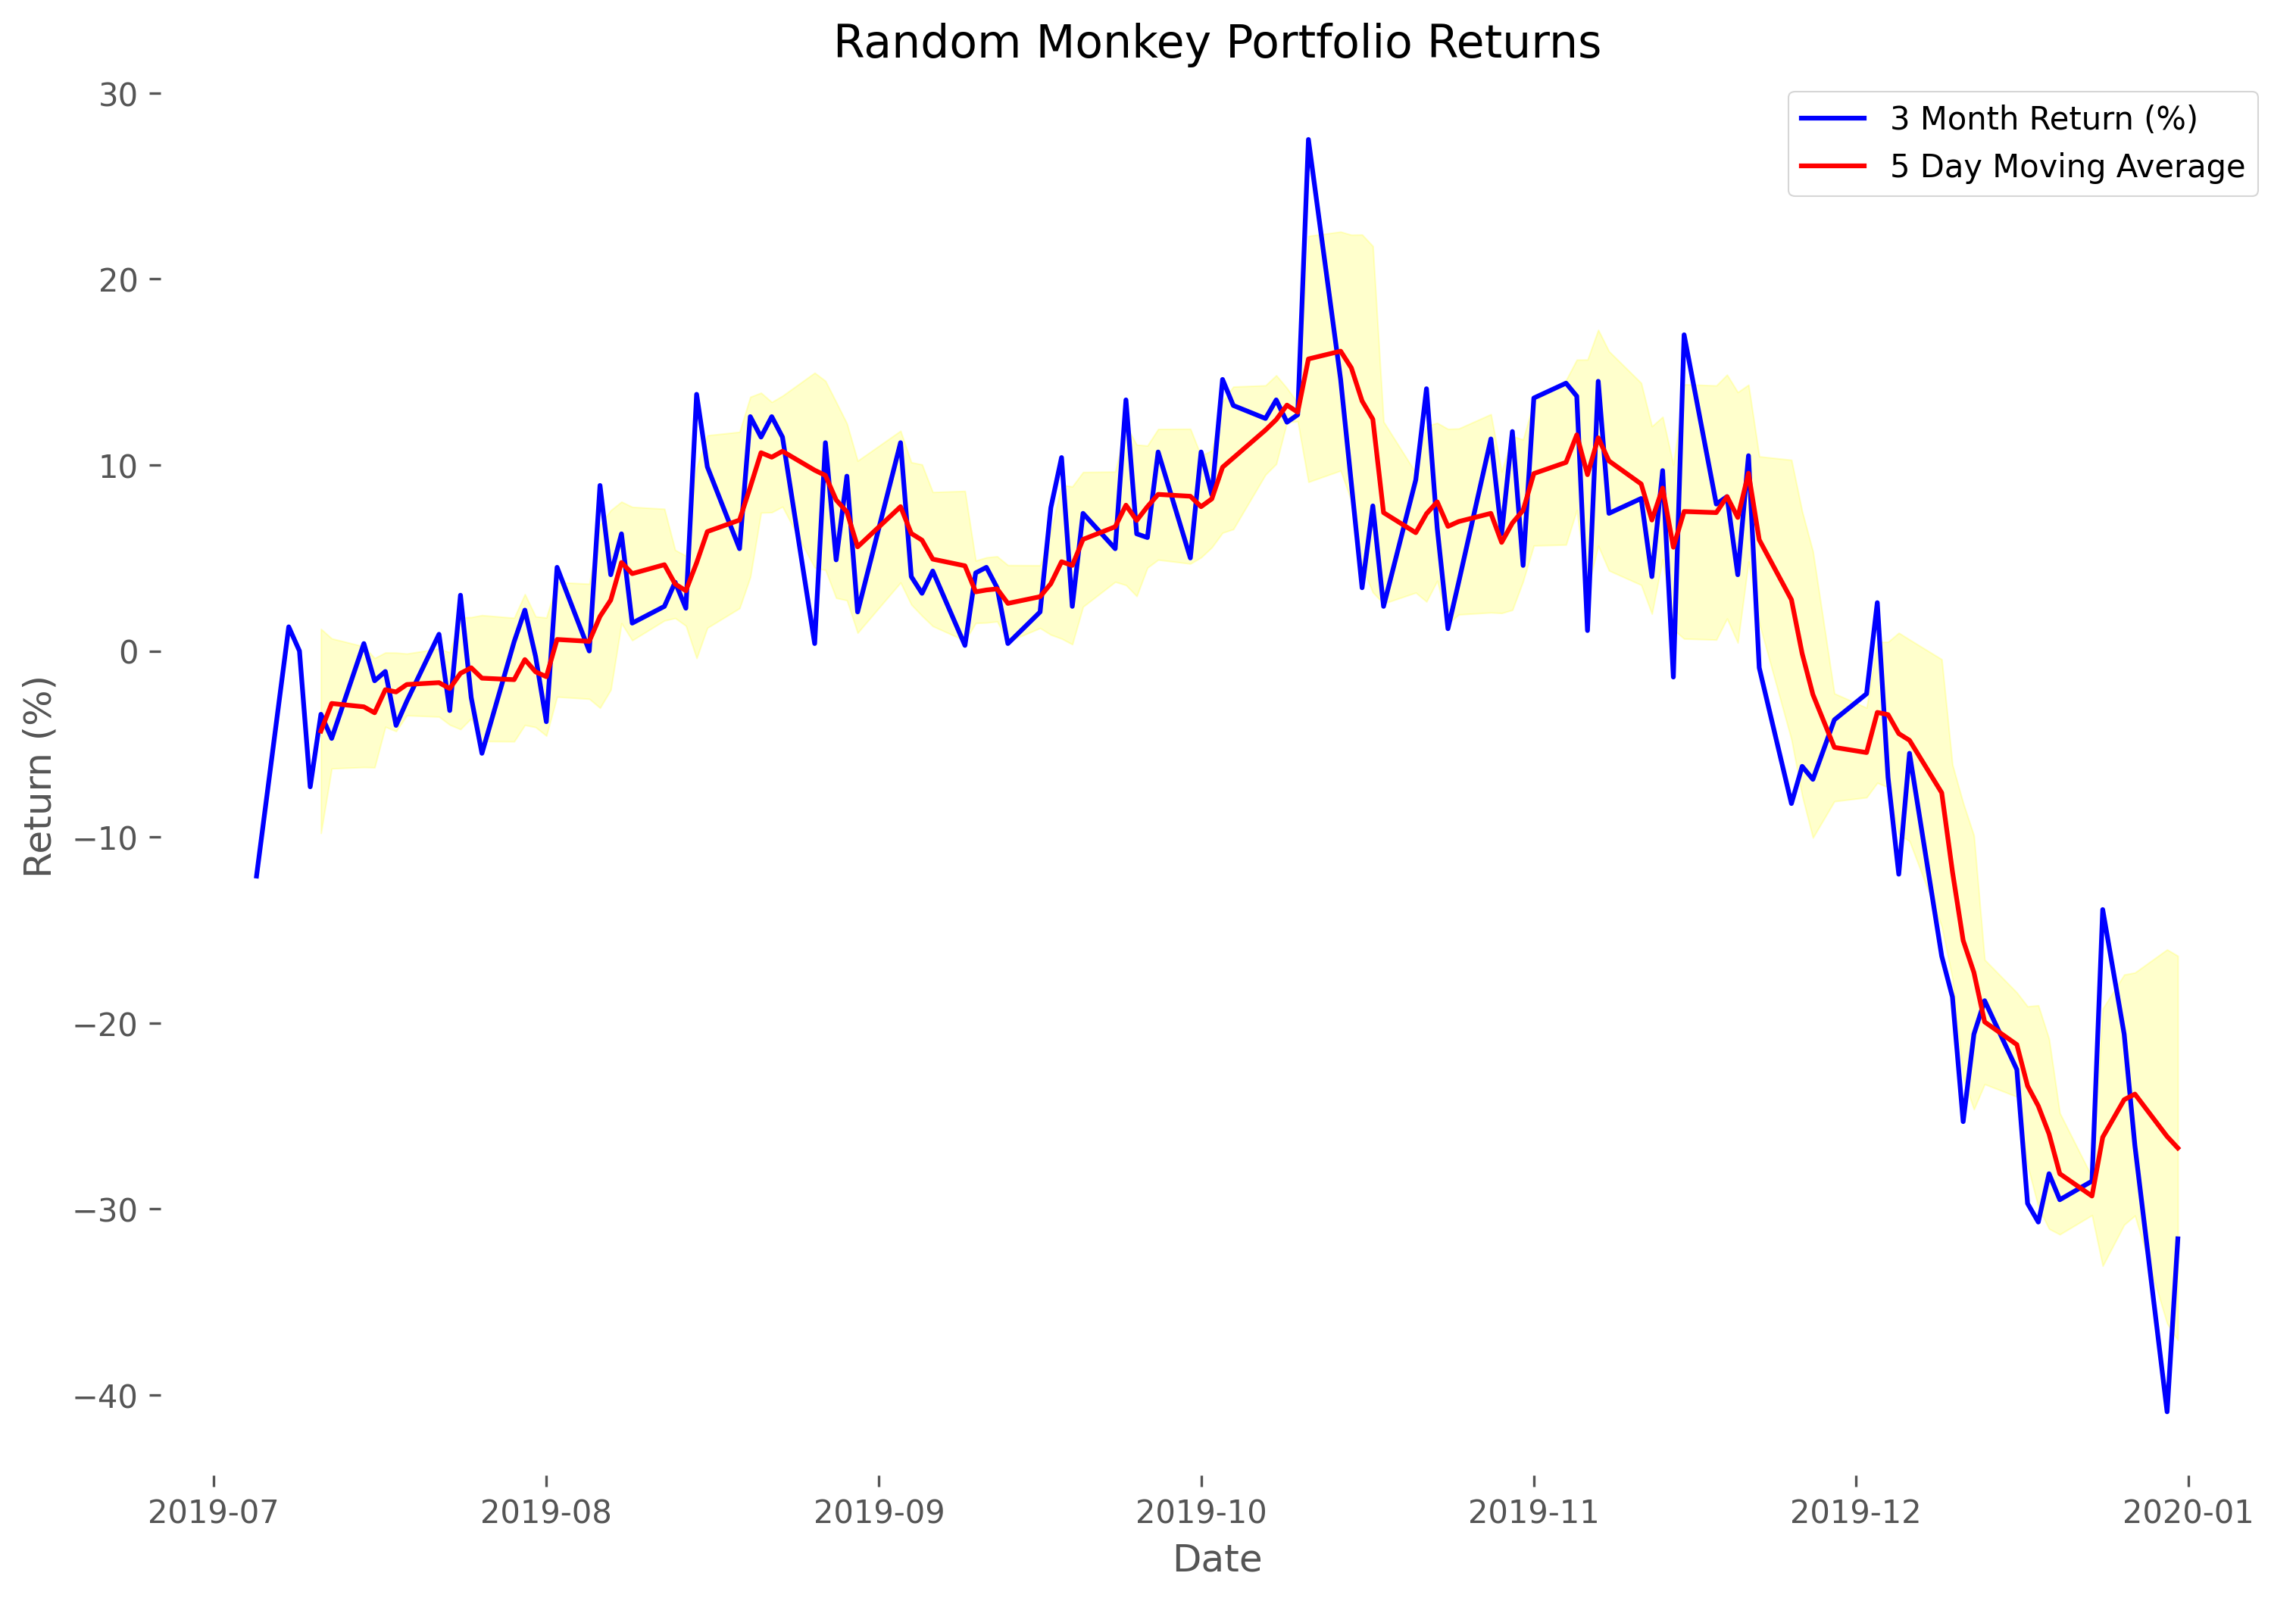

In [49]:
# plot the portfolio returns
import matplotlib.pyplot as plt
# Calculate moving averages and moving variance
moving_average = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].rolling(window=5).mean()
moving_variance = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].rolling(window=5).std()

# Plot the portfolio returns
plt.figure(figsize=(12,8), facecolor='white', dpi=300)
# remove the grid
plt.grid(False)
# box around plot area white
plt.box(False)
plt.plot(random_portfolio_returns.index, random_portfolio_returns['Random Monkey - 3 Month Return (%)'], label='3 Month Return (%)', color='b')
plt.plot(moving_average.index, moving_average, label='5 Day Moving Average', color='r')
# plot rolling confidence interval as a yellow box
plt.fill_between(moving_variance.index, moving_average-moving_variance, moving_average+moving_variance, color='yellow', alpha=0.2)
plt.title('Random Monkey Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()


In [36]:
# max return
max_return = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].max()
# min return
min_return = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].min()
date_max = random_portfolio_returns[random_portfolio_returns['Random Monkey - 3 Month Return (%)'] == max_return].index[0]
date_min = random_portfolio_returns[random_portfolio_returns['Random Monkey - 3 Month Return (%)'] == min_return].index[0]
print(f'max return: {max_return} for date:{date_max}')
print(f'min return: {min_return} for date:{date_min}')

max return: 27.5 for date:2019-10-11 00:00:00
min return: -40.9 for date:2019-12-30 00:00:00


In [46]:
# average return
average_return = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].mean()
# standard deviation of returns
std_return = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].std()
print(f'average return: {average_return}')
print(f'standard deviation of returns: {std_return}')

average return: 0.9599999999999997
standard deviation of returns: 12.134840536187927


C:\Users\nicol\AppData\Local\Temp\ipykernel_11000\1339434961.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_portfolio_returns['Random Monkey - 3 Month Return (%)'], bins=20, color='b')


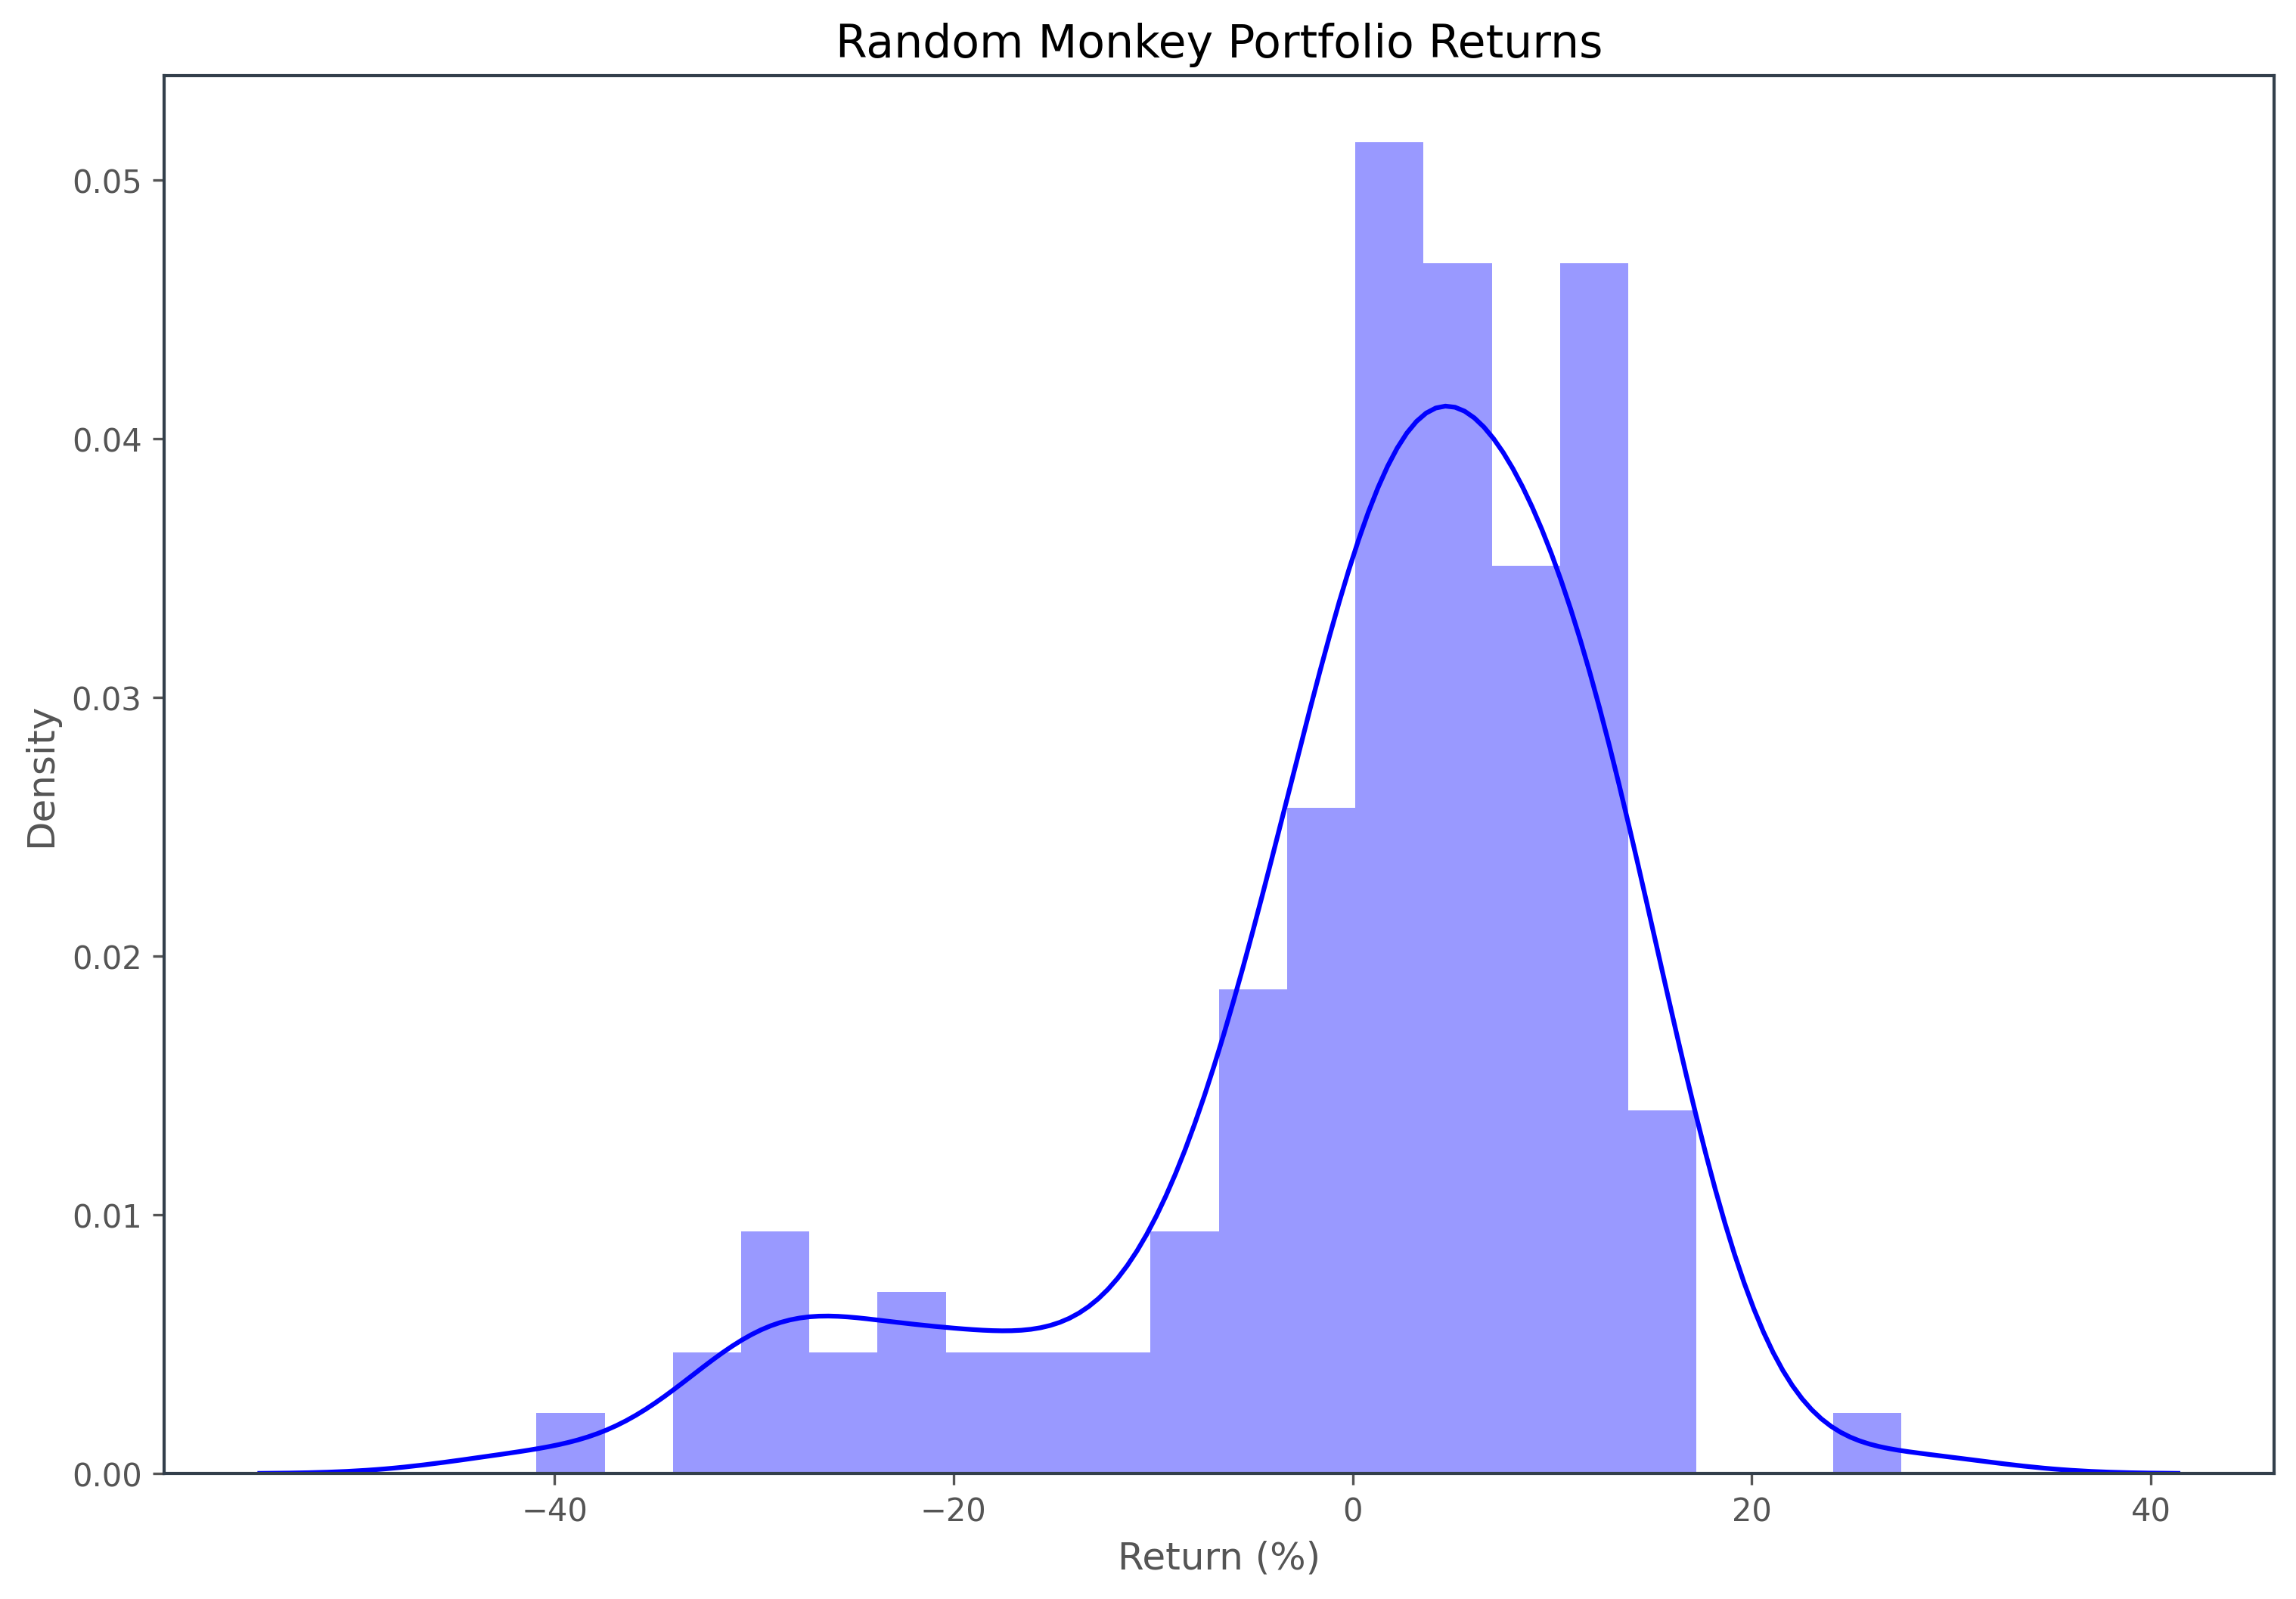

In [54]:
# density plot of the portfolio retuns
import seaborn as sns
plt.figure(figsize=(12,8), facecolor='white', dpi=300)
sns.distplot(random_portfolio_returns['Random Monkey - 3 Month Return (%)'], bins=20, color='b')
plt.title('Random Monkey Portfolio Returns')
plt.xlabel('Return (%)')
plt.ylabel('Density')
plt.show()
